# Deforestation Dataset
---
An exploratory analysis. 

LINK: https://www.kaggle.com/datasets/konradb/deforestation-dataset?resource=download

Importing libraries:

In [159]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Data:

In [160]:
# Defining the path to file:
path = 'goal15.forest_shares.csv'

# Assigning dataframe to a variable:
df = pd.read_csv(path)

# Preview:
df.head(5)

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


### Firsts Steps:

- Removing unecessary columns;

- Renaming columns;

- Checking duplicates;

- Checking types;

- Main informations: mean, median, countrows, min and max.

 As the column trend is the percentual of growth or decrease between 2020 and 2000 we will remove it. Because is not a new information, but a relation between the other columns.

In [161]:
# Removing the column 'trend'
df = df[['iso3c', 'forests_2000', 'forests_2020']]

# Preview:
df.head(5)

,iso3c,forests_2000,forests_2020
0,AFG,1.9,1.9
1,ALB,28.1,28.8
2,DZA,0.7,0.8
3,ASM,88.7,85.7
4,AND,34.0,34.0


In [162]:
# To make easier the understanding, we will rename the columns:

# Renaming
new_names = {'iso3c': 'country', 'forests_2000': 'f_2000', 'forests_2020': 'f_2020'}
df = df.rename(columns=new_names)

# Preview:
df.head(5)

,country,f_2000,f_2020
0,AFG,1.9,1.9
1,ALB,28.1,28.8
2,DZA,0.7,0.8
3,ASM,88.7,85.7
4,AND,34.0,34.0


To check the duplicates, we will check first in the dataset to search duplicate lines. And after, just on the country column, to search if there exists duplicate countries.

In [163]:
# Checking the Duplicates on Dataset:
total_duplicates = df.duplicated()
print("Total duplicates on dataset: ",total_duplicates)

Total duplicates on dataset:  0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     F

In [164]:
# Checking the Duplicates on country column:
country_duplicates = df.duplicated(subset=['country'])
print("Duplicated countries: ",country_duplicates)

Duplicated countries:  0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75

As the dataset do not show any duplicated value, we don't need any data treatment.

In [165]:
# Checking the data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  237 non-null    object 
 1   f_2000   237 non-null    float64
 2   f_2020   237 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


Data type are in accordance with the expectation.

In [166]:
# Main information:
df.describe()

,f_2000,f_2020
count,237.000000,237.000000
mean,32.255274,31.585654
std,25.366225,24.744673
min,0.000000,0.000000
25%,9.900000,10.400000
50%,30.300000,30.300000
75%,50.900000,49.800000
max,98.300000,97.400000


### Complementing the analysis with more data

To complement the visualization of the dataset, I will bring the information of the name of the continent and the full name of the country from the dataset:

LINK: https://datahub.io/core/country-codes#data

In [167]:
# Defining the path to file:
path2 = 'country-codes_csv.csv'

# Assigning dataframe to a variable:
country_info = pd.read_csv(path2)

# Preview:
country_info.head(5)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,ITU,IOC,DS,UNTERM Spanish Formal,Global Code,Intermediate Region Code,official_name_fr,UNTERM French Short,ISO4217-currency_name,Developed / Developing Countries,UNTERM Russian Formal,UNTERM English Short,ISO4217-currency_alphabetic_code,Small Island Developing States (SIDS),UNTERM Spanish Short,ISO4217-currency_numeric_code,UNTERM Chinese Formal,UNTERM French Formal,UNTERM Russian Short,M49,Sub-region Code,Region Code,official_name_ar,ISO4217-currency_minor_unit,UNTERM Arabic Formal,UNTERM Chinese Short,Land Locked Developing Countries (LLDC),Intermediate Region Name,official_name_es,UNTERM English Formal,official_name_cn,official_name_en,ISO4217-currency_country_name,Least Developed Countries (LDC),Region Name,UNTERM Arabic Short,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,NaN,TW,NaN,TPE,RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,AFG,AFG,AFG,República Islámica del Afganistán (la),True,NaN,Afghanistan,Afghanistan (l') [masc.],Afghani,Developing,Исламская Республика Афганистан,Afghanistan,AFN,NaN,Afganistán (el),971,阿富汗伊斯兰共和国,République islamique d'Afghanistan,Афганистан,4.0,34.0,142.0,أفغانستان,2,جمهورية أفغانستان الإسلامية,阿富汗,x,NaN,Afganistán,the Islamic Republic of Afghanistan,阿富汗,Afghanistan,AFGHANISTAN,x,Asia,أفغانستان,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3,AL,AB,AL,ALB,ALB,AL,la República de Albania,True,NaN,Albanie,Albanie (l') [fém.],Lek,Developed,Республика Албания,Albania,ALL,NaN,Albania,008,阿尔巴尼亚共和国,la République d'Albanie,Албания,8.0,39.0,150.0,ألبانيا,2,جمهورية ألبانيا,阿尔巴尼亚,NaN,NaN,Albania,the Republic of Albania,阿尔巴尼亚,Albania,ALBANIA,NaN,Europe,ألبانيا,Southern Europe,Албания,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4,AG,AL,DZ,ALG,ALG,DZ,la República Argelina Democrática y Popular,True,NaN,Algérie,Algérie (l') [fém.],Algerian Dinar,Developing,Алжирская Народная Демократическая Республика,Algeria,DZD,NaN,Argelia,012,阿尔及利亚民主人民共和国,la République algérienne démocratique et popul...,Алжир,12.0,15.0,2.0,الجزائر,2,الجمهورية الجزائرية الديمقراطية الشعبية,阿尔及利亚,NaN,NaN,Argelia,the People's Democratic Republic of Algeria,阿尔及利亚,Algeria,ALGERIA,NaN,Africa,الجزائر,Northern Africa,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5,AQ,NaN,AS,SMA,ASA,USA,NaN,True,NaN,Samoa américaines,NaN,US Dollar,Developing,NaN,NaN,USD,x,NaN,840,NaN,NaN,NaN,16.0,61.0,9.0,ساموا الأمريكية,2,NaN,NaN,NaN,NaN,Samoa Americana,NaN,美属萨摩亚,American Samoa,AMERICAN SAMOA,NaN,Oceania,NaN,Polynesia,Американское Самоа,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [168]:
# Defining the essential columns to merge with our first dataset:
country_info = country_info[["ISO3166-1-Alpha-3","Developed / Developing Countries","official_name_en","Region Name","Sub-region Name"]]
country_info.head(5)

,ISO3166-1-Alpha-3,Developed / Developing Countries,official_name_en,Region Name,Sub-region Name
0,TWN,NaN,NaN,NaN,NaN
1,AFG,Developing,Afghanistan,Asia,Southern Asia
2,ALB,Developed,Albania,Europe,Southern Europe
3,DZA,Developing,Algeria,Africa,Northern Africa
4,ASM,Developing,American Samoa,Oceania,Polynesia


In [169]:
# To make easier the understanding, we will rename the columns:

# Renaming
new_names2 = {'ISO3166-1-Alpha-3': 'country', 'Developed / Developing Countries': ' ', 'official_name_en': 'country_name', 'Region Name': 'continent', 'Sub-region Name': 'region'}
country_info = country_info.rename(columns=new_names2)

# Preview:
country_info.head(5)

,country,,country_name,continent,region
0,TWN,NaN,NaN,NaN,NaN
1,AFG,Developing,Afghanistan,Asia,Southern Asia
2,ALB,Developed,Albania,Europe,Southern Europe
3,DZA,Developing,Algeria,Africa,Northern Africa
4,ASM,Developing,American Samoa,Oceania,Polynesia


In [170]:
# Merging dataframes:

dataframe = pd.merge(df, country_info, on='country', how='inner', indicator=True)


# Preview:
dataframe.head(5)

,country,f_2000,f_2020,,country_name,continent,region,_merge
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,both
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,both
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,both
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,both
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,both


In [171]:
# Checking if all the countries were merged:
dataframe.describe()

,f_2000,f_2020
count,236.000000,236.000000
mean,32.256780,31.587288
std,25.420128,24.797253
min,0.000000,0.000000
25%,9.875000,10.275000
50%,29.950000,30.200000
75%,51.200000,49.875000
max,98.300000,97.400000


By carefully examining and comparing the results between the .info() of the initial dataset and the result of the .info() from the merged dataset, you can identify that there is a missing row. We will investigate this further in the following lines of code:

In [172]:
missing_row = df[~df['country'].isin(dataframe['country'])]

# Exibir a linha perdida
print("Missing row:")
print(missing_row)

Missing row:
    country  f_2000  f_2020
233     WLD    31.9    31.2


As the country in the first dataset is referred to the ISO 3116 code for countries, in the official site of ISO, we will search for this code.

Acessing https://www.iso.org/iso-3166-country-codes.html, we follow the first link, redirecting to a search site:

https://www.iso.org/obp/ui/#search

Searching for 'WLD', no results were found. 

So, we can assume that the first dataset has a outlier. As the page in the Kaggle does not mentioned this case and is not in the official site of ISO 3166, we can remove it form our analysis.

In [173]:
# Dropping the merge column:
dataframe = dataframe.drop('_merge', axis=1)

# Preview:
dataframe.head(3)

,country,f_2000,f_2020,,country_name,continent,region
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa


Defining theme for graphs:

In [174]:
sns.set_theme(palette='tab10',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Understanding distribuition and maximum and minimum area percent:

Distribution of forests in 2000 and 2020;

Country with the highest percentage of area in 2000 and 2020;

Country with the lower percentage of area in 2000 and 2020.

Text(0.5, 1.0, 'Distribution of forests in 2000')

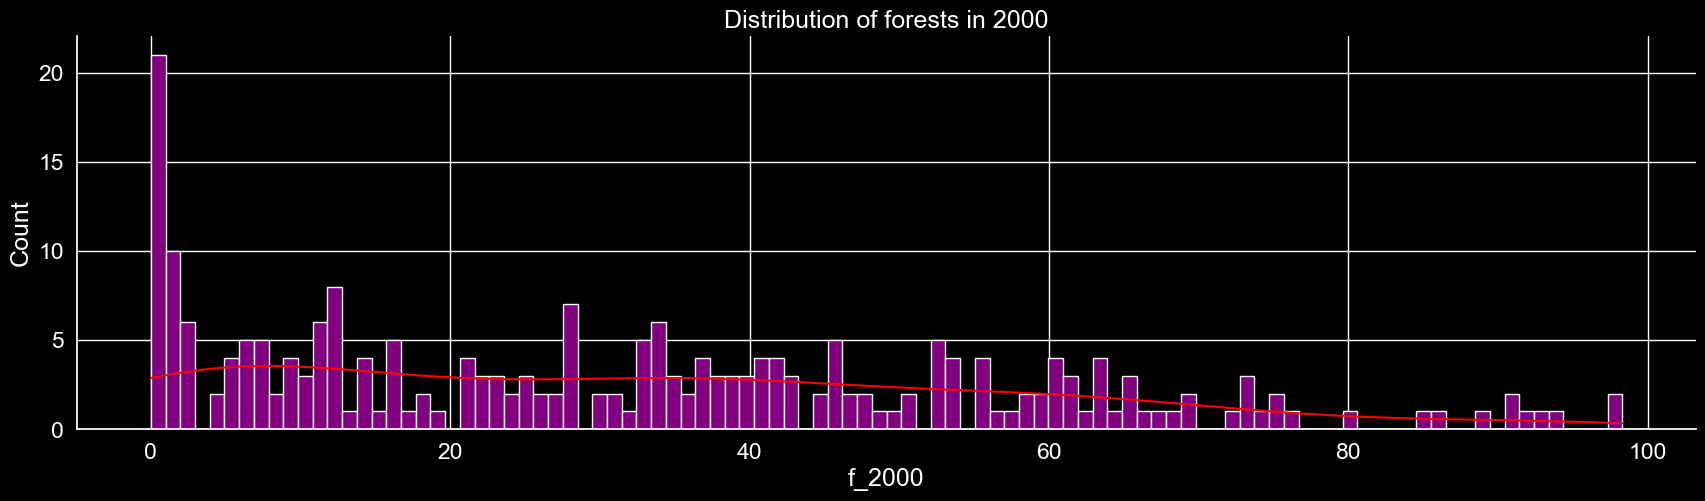

In [175]:
# Distribution of forests in 2000
sns.displot(data=dataframe, x="f_2000", kde=True, bins = 100,color = "red", facecolor = "purple",height = 5, aspect = 3.5)
plt.title("Distribution of forests in 2000")

Text(0.5, 1.0, 'Distribution of forests in 2020')

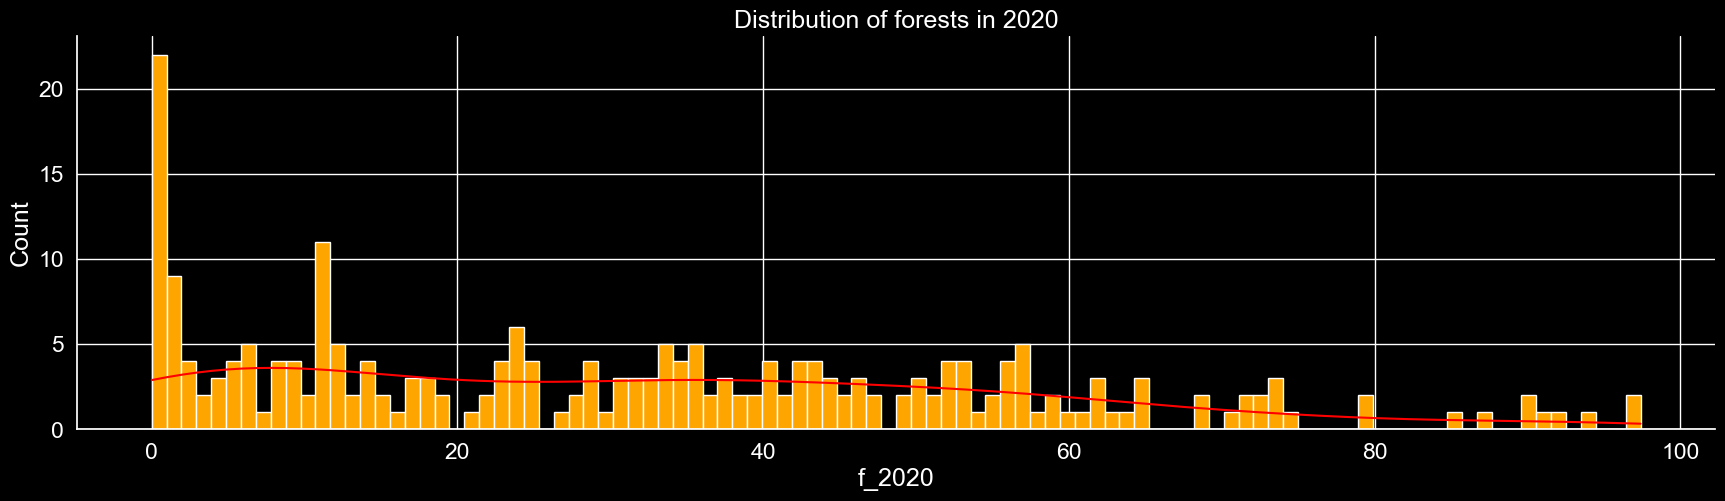

In [176]:
# Distribution of forests in 2020
sns.displot(data=dataframe, x="f_2020", kde=True, bins = 100,color = "red", facecolor = "orange",height = 5, aspect = 3.5)
plt.title("Distribution of forests in 2020")

In [177]:
# Country with the highest percentage of area in 2000:
max_f_2000 = dataframe.loc[df['f_2000'].idxmax(), 'country_name']
print("Country with the highest percentage of area in 2000:", max_f_2000)

Country with the highest percentage of area in 2000: Suriname


In [178]:
# Country with the highest percentage of area in 2020:
max_f_2020 = dataframe.loc[df['f_2020'].idxmax(), 'country_name']
print("Country with the highest percentage of area in 2020:", max_f_2020)

Country with the highest percentage of area in 2020: Suriname


Suriname kept being the country with the highest percent area of forest. Let's check this number:

In [179]:
dataframe.loc[dataframe['country_name'] == 'Suriname']

,country,f_2000,f_2020,,country_name,continent,region
202,SUR,98.3,97.4,Developing,Suriname,Americas,Latin America and the Caribbean
